# Setup

In [45]:
import numpy as np
import seaborn as sns
import pandas as pd
import glob

# Functions

In [46]:
def read_csv(filepath, cols, names):
    df = pd.read_csv(filepath, usecols = cols, names = names, header = None)
    df = df.drop([0], axis = 0) # Remove first row (headers)
    df = df.astype('float64') # Cast data to floats
    
    return df

In [47]:
def get_class_df(file_path, df):
    class_name = '_'.join(file_path.split('\\')[-1].split('_')[:-1])

    return pd.DataFrame({'class': [class_name for _ in range(len(df))]})

In [48]:
def read_acc_mag_csvs():
    X = pd.DataFrame()
    y = pd.DataFrame(columns=['class'])
    
    for file in glob.glob('data/cleaned/acc_mag/*.csv'):

        if 'acc' in file.split('\\')[-1]:
            mag_file = file.replace(file.split('\\')[-1], file.split('\\')[-1].replace('acc', 'mag'))
            
            df_acc = read_csv(file, [1,2,3], ['ax', 'ay', 'az'])
            df_mag = read_csv(mag_file, [1,2,3], ['mx', 'my', 'mz'])
            
            df = pd.concat([df_acc, df_mag], axis=1, join='inner')
            X = X.append(df, ignore_index=True)            

            y = y.append(get_class_df(file, df), ignore_index=True)

    return X, y

In [49]:
def read_acc_mag_gyro_csvs():
    X = pd.DataFrame()
    y = pd.DataFrame(columns=['class'])
    
    for file in glob.glob('data/cleaned/acc_mag_gyro/*.csv'):

        if 'acc' in file.split('\\')[-1]:
            mag_file = file.replace(file.split('\\')[-1], file.split('\\')[-1].replace('acc', 'mag'))
            gyro_file = file.replace(file.split('\\')[-1], file.split('\\')[-1].replace('acc', 'gyro'))
            
            df_acc = read_csv(file, [1,2,3], ['ax', 'ay', 'az'])
            df_mag = read_csv(mag_file, [1,2,3], ['mx', 'my', 'mz'])
            df_gyro = read_csv(gyro_file, [1,2,3], ['gx', 'gy', 'gz'])
            
            df = pd.concat([df_acc, df_mag, df_gyro], axis=1, join='inner')
            X = X.append(df, ignore_index = True)
            
            y = y.append(get_class_df(file, df), ignore_index=True)
        
    return X, y

In [50]:
def get_filepaths_from_folder(path, filter=''):
    files = []
    
    for file in glob.glob(path + '*'):
        if filter in file.split('\\')[-1]:
            files.append(file)
        
    return files

# Prepare data

## Trim data

### Functions

In [51]:
def inspect_acc_mag_gyro_data(df_acc, df_mag, df_gyro):
    df_acc.plot(kind = "line", title='Inspection of raw acc data', figsize=(15,3))
    df_mag.plot(kind = "line", title='Inspection of raw mag data', figsize=(15,3))
    df_gyro.plot(kind = "line", title='Inspection of raw gyro data', figsize=(15,3))

In [72]:
def remove_junk_data(df_acc, df_mag, df_gyro, lower, upper):
    upper = upper - lower

    # Remove lower part
    df_acc = df_acc.drop(df_acc.index[:lower], axis=0)
    df_mag = df_mag.drop(df_mag.index[:lower//10], axis=0)
    df_gyro = df_gyro.drop(df_gyro.index[:lower], axis=0)

    # Remove upper part
    df_acc = df_acc.drop(df_acc.index[upper:], axis=0)
    df_mag = df_mag.drop(df_mag.index[upper//10:], axis=0)
    df_gyro = df_gyro.drop(df_gyro.index[upper:], axis=0)

    return df_acc, df_mag, df_gyro

In [53]:
def save_changes(df_acc, df_mag, df_gyro):
    cleaned_acc_filepath = raw_data_filepaths[index].replace('raw', 'cleaned')
    cleaned_mag_filepath = mag_filepath.replace('raw', 'cleaned')
    cleaned_gyro_filepath = gyro_filepath.replace('raw', 'cleaned')

    with open(cleaned_acc_filepath, 'w') as f:
        f.close()
    df_acc.to_csv(cleaned_acc_filepath)

    with open(cleaned_mag_filepath, 'w') as f:
        f.close()
    df_mag.to_csv(cleaned_mag_filepath)

    with open(cleaned_gyro_filepath, 'w') as f:
        f.close()
    df_gyro.to_csv(cleaned_gyro_filepath)

    print('Cleaned data written to:')
    print(cleaned_acc_filepath)
    print(cleaned_mag_filepath)
    print(cleaned_gyro_filepath)

### Inspection and removal of junk data

Get filepaths:

In [194]:
raw_data_filepaths = get_filepaths_from_folder('data/raw/acc_mag_gyro/all/', filter='acc')
raw_data_filepaths

['data/raw/acc_mag_gyro/all\\run_walk_jump_pushup_acc1.csv',
 'data/raw/acc_mag_gyro/all\\run_walk_jump_pushup_acc2.csv']

Index in file list to work with:

In [205]:
index = 1

Read and inspect data:

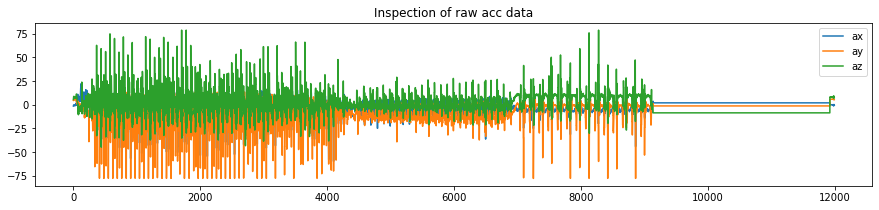

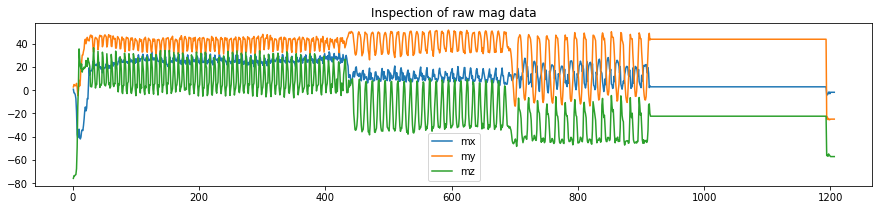

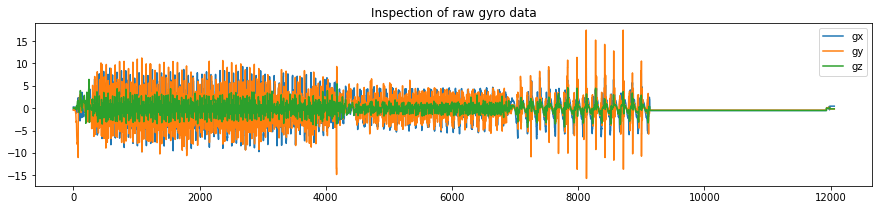

In [208]:
mag_filepath = 'mag'.join(raw_data_filepaths[index].rsplit('acc', 1))
gyro_filepath = 'gyro'.join(raw_data_filepaths[index].rsplit('acc', 1))

df_acc_raw = read_csv(raw_data_filepaths[index], [2,3,4], ['ax', 'ay', 'az'])
df_mag_raw = read_csv(mag_filepath, [2,3,4], ['mx', 'my', 'mz'])
df_gyro_raw = read_csv(gyro_filepath, [2,3,4], ['gx', 'gy', 'gz'])

inspect_acc_mag_gyro_data(df_acc_raw, df_mag_raw, df_gyro_raw)

Inspect data:

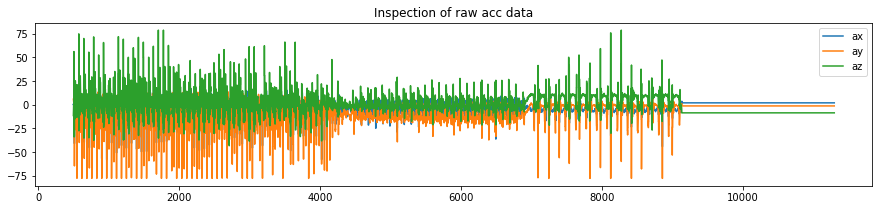

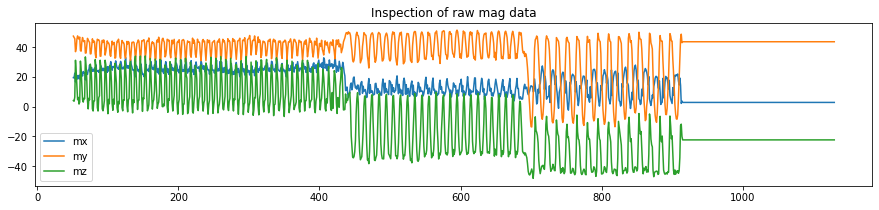

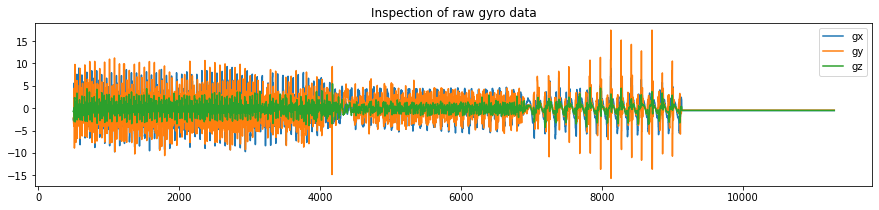

In [209]:
df_acc_clean, df_mag_clean, df_gyro_clean = remove_junk_data(df_acc_raw, df_mag_raw, df_gyro_raw, lower=500, upper=11300)
inspect_acc_mag_gyro_data(df_acc_clean, df_mag_clean, df_gyro_clean)

In [210]:
save_changes(df_acc_clean, df_mag_clean, df_gyro_clean)

Cleaned data written to:
data/cleaned/acc_mag_gyro/all\run_walk_jump_pushup_acc2.csv
data/cleaned/acc_mag_gyro/all\run_walk_jump_pushup_mag2.csv
data/cleaned/acc_mag_gyro/all\run_walk_jump_pushup_gyro2.csv


## Read data sets

In [39]:
X_acc_mag_gyro, y_acc_mag_gyro = read_acc_mag_gyro_csvs()

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_acc_mag_gyro, y_acc_mag_gyro, test_size=0.2, random_state=42)

## Pairplot

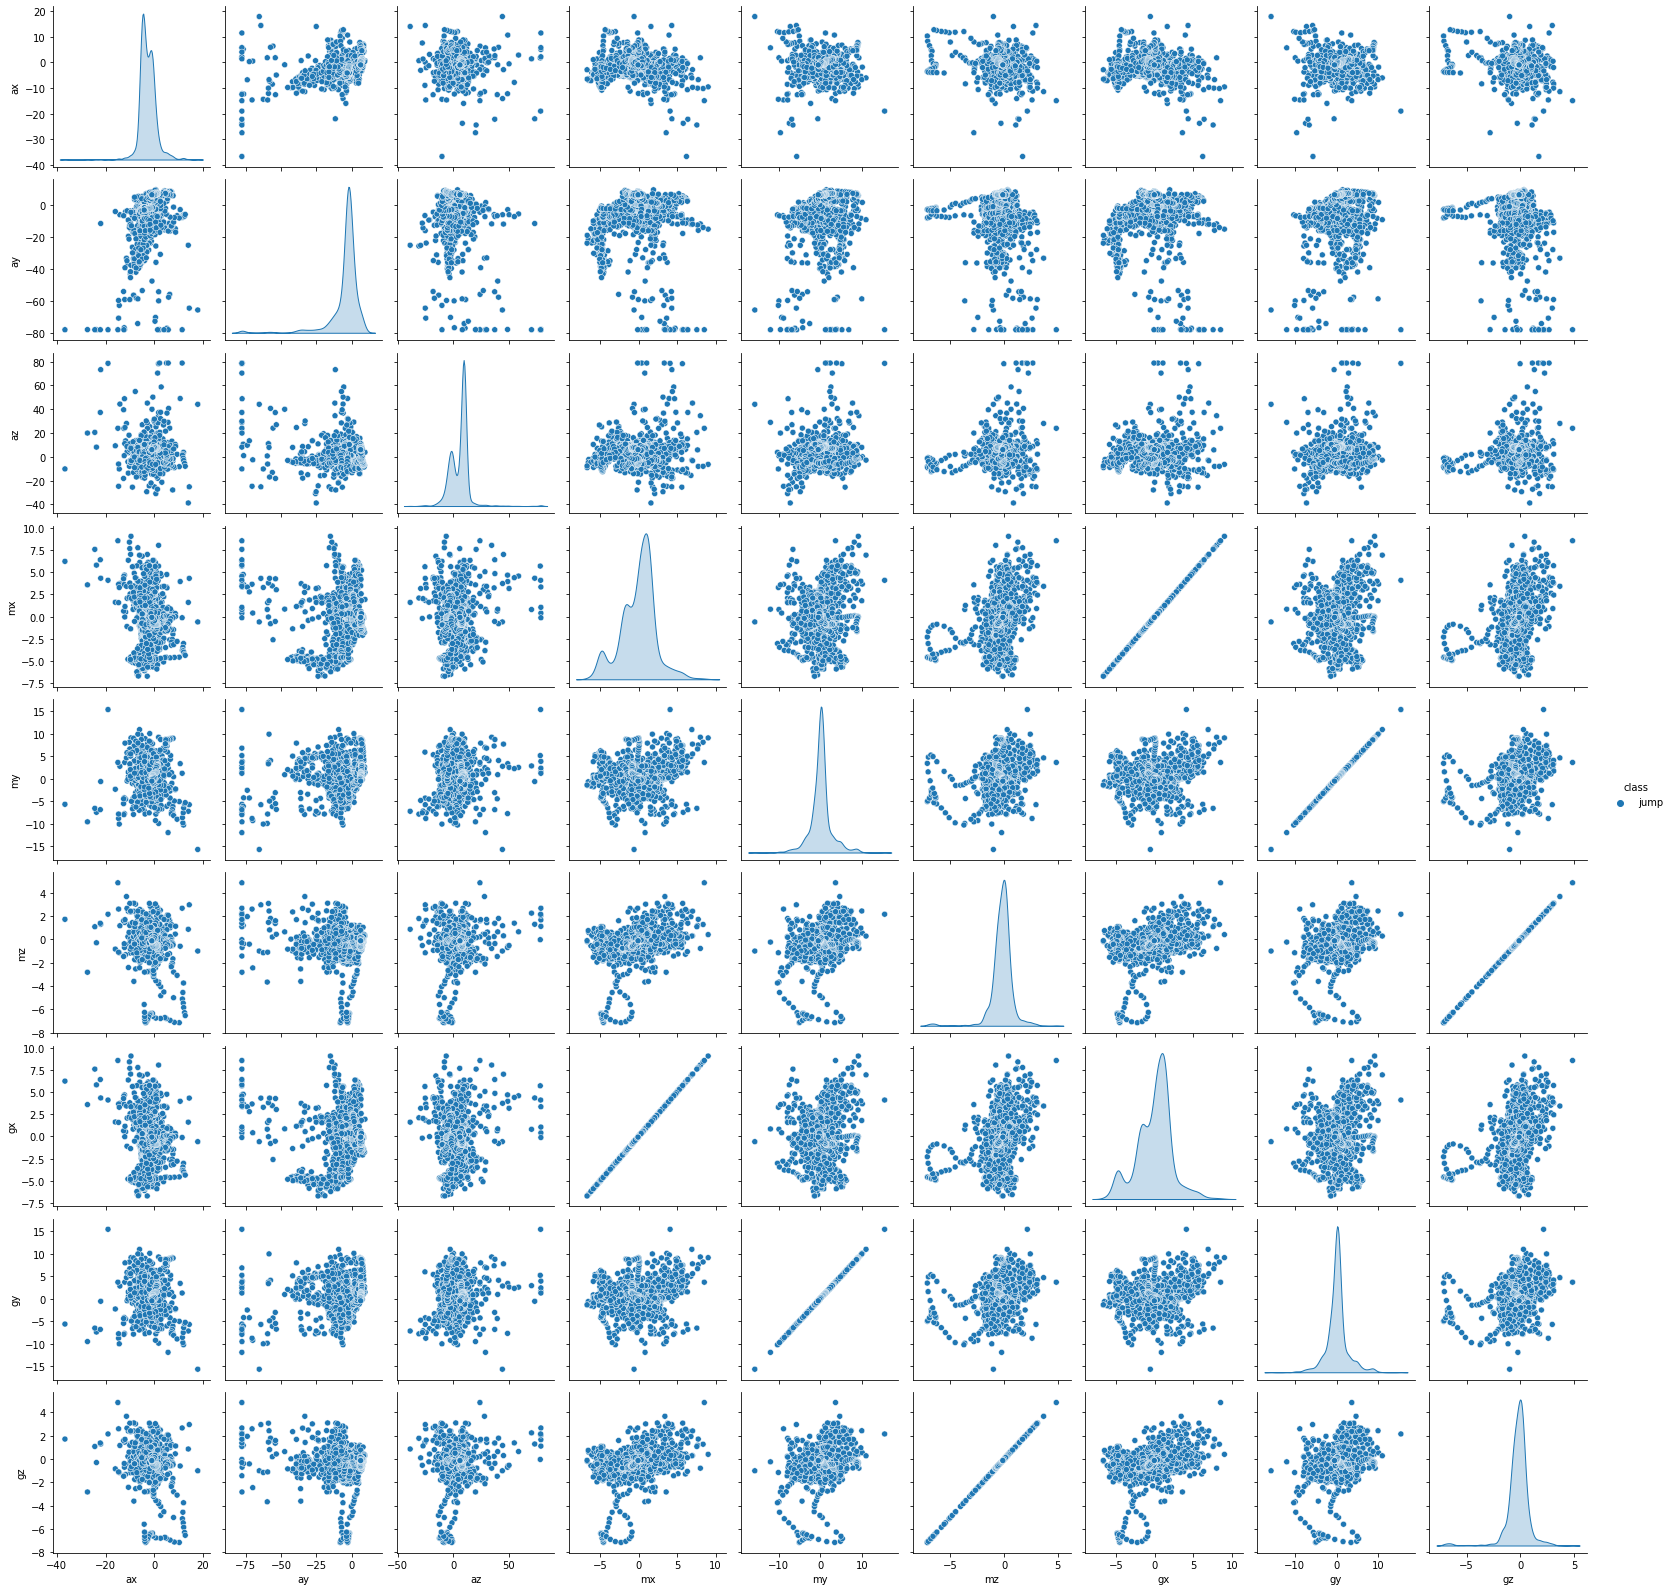

In [41]:
entire_set = pd.concat([X_acc_mag_gyro, y_acc_mag_gyro], axis=1)
sns.pairplot(entire_set, hue='class')